# Genpact Hackathon - Food Delivery Order Forecasting - Final Model
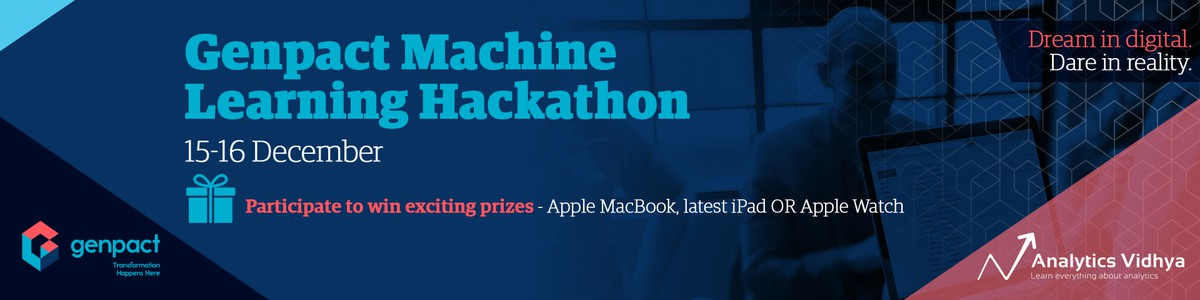

<B>Approach:</B>
We now take the predicted values of the 4 algorithm and use Random Forest with cross validation to make the final prediction

In [1]:
import os
os.chdir('D:/Shikhar/Coding/Hackathon/Genpact_ML_hackathon')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [3]:
train_dataset = pd.read_csv ('Dataset/Stack_Train.csv', dtype = {'id':np.object})
test_dataset = pd.read_csv ('Dataset/Stack_Test.csv', dtype = {'id':np.object})
train_dataset.head()

,id,num_orders,num_orders_LGBM,num_orders_CB,num_orders_RF,num_orders_XGB
0,1379560,177.0,226.421388,275.634940,221.44,226.93648
1,1466964,270.0,256.127585,264.344071,235.53,322.96277
2,1346989,189.0,196.687989,238.918733,189.45,158.99388
3,1338232,54.0,78.922301,66.934899,39.54,71.17373
4,1448490,40.0,70.133334,72.197283,58.96,39.21627


In [4]:
label = train_dataset.num_orders
train_predictors = train_dataset.drop('num_orders', axis = 1).select_dtypes(exclude = ['object'])
test_predictors = test_dataset.select_dtypes(exclude = ['object'])

In [5]:
rf_params = {"max_depth": 5, "min_samples_split": 2}

In [7]:
model = RandomForestRegressor(**rf_params)
model = model.fit(train_predictors, label)

In [8]:
err=[]
y_pred_train_tot = []
y_pred_test_tot = []

kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 89)

for train_index, validate_index in kfold.split(train_predictors, label):
    print(train_index.shape, validate_index.shape)
    X_train_cv, X_validate_cv = train_predictors.iloc[train_index], train_predictors.iloc[validate_index]
    y_train_cv, y_validate_cv = label[train_index], label[validate_index]
    
    # training with early stop
    forest = RandomForestRegressor(**rf_params, random_state = 89)
    rf_model5 = forest.fit(X_train_cv, y_train_cv)
    pred_train = rf_model5.predict(train_predictors)
    pred_test = rf_model5.predict(test_predictors)
    
    y_pred_train_tot.append(pred_train)
    y_pred_test_tot.append(pred_test)

y_train_pred = np.mean(y_pred_train_tot,0)
y_test_pred = np.mean(y_pred_test_tot,0)
y_test_pred

(365158,) (91390,)
(365055,) (91493,)
(364876,) (91672,)
(365466,) (91082,)
(365637,) (90911,)


array([109.53221481, 109.53221481, 145.87110313, ..., 257.82086642,
       415.75677895, 312.48450017])

In [9]:
y_train_pred = np.mean(y_pred_train_tot,0)
y_test_pred = np.mean(y_pred_test_tot,0)
y_test_pred

array([109.53221481, 109.53221481, 145.87110313, ..., 257.82086642,
       415.75677895, 312.48450017])

In [10]:
train_dataset['num_orders_predicted'] = y_train_pred
test_dataset['num_orders'] = y_test_pred

In [11]:
# Output the Dataframe into a CSV file
train_dataset.to_csv('Dataset/Stack_Train_With_Prediction.csv',  index = False)
test_dataset[['id', 'num_orders']].to_csv('Dataset/Final_Submission_Anupam.csv',  index = False)
test_dataset.drop('num_orders', axis = 1, inplace = True)